In [ ]:
!mkdir custom
!mkdir custom/test
!mkdir custom/test_pairs.txt
!mkdir custom/t-p.txt
!mkdir custom/test/cloth
!mkdir custom/test/cloth-mask
!mkdir custom/test/image
!mkdir custom/test/image-mask
!mkdir custom/test/image-parse
!mkdir custom/test/image-parse-new
!mkdir custom/test/pose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**GETTING THE USER'S IMAGE**

In [ ]:
import cv2
img=cv2.imread('/content/000183_0.jpg')
cv2.imwrite ('/content/custom/test/image/000183_0.jpg', img)

In [99]:
#https://drive.google.com/file/d/1NiZXCv8rON41s_MOw9VpPIpd3VygF8M4/view?usp=sharing
!gdown --id "1NiZXCv8rON41s_MOw9VpPIpd3VygF8M4"

Permission denied: https://drive.google.com/uc?id=1NiZXCv8rON41s_MOw9VpPIpd3VygF8M4
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
#masking of user Image
bgr = cv2.imread("/content/custom/test/image/000183_0.jpg")
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
_, roi = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)
cont = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(output, cont[0], -1, (255, 255, 255))
cont = cont[0] if len(cont) == 2 else cont[1]
cv2.fillPoly(output, cont, [255,255,255])
cv2.imwrite(r'C:\Users\lenovo\Desktop\try_on\custom\test\image-mask/000183_0.png',output)

**GETTING THE CLOTH**

In [ ]:
img1=cv2.imread('/content/000560_1.jpg')
cv2.imwrite ('/content/custom/test/cloth/000560_0.jpg', img1)

In [ ]:
#https://drive.google.com/file/d/1aVOC3gNORESQf8t5hZDYdCUX3GimrB1C/view?usp=sharing
!gdown --id "1aVOC3gNORESQf8t5hZDYdCUX3GimrB1C"

In [ ]:
img2=cv2.imread('/content/000560_1 (1).jpg')
cv2.imwrite('/content/custom/test/cloth-mask/000560_0.jpg', img2)

In [5]:
#file_write
import os
save_path='/content/custom'
file_name1='test_pairs.txt'
file_name2='t-p.txt'
completeName1=os.path.join(save_path,file_name1)
file1=open(completeName1,"w")
file1.write('/000183_0.jpg')
file1.close()
completeName2=os.path.join(save_path,file_name2)
file2=open(completeName2,"w")
file2.write('000183_0.jpg ')
file2.write('000560_0.jpg')
file2.close()

**JPPNET**

**SETUP**

In [ ]:
!pip install Tensorflow==1.13.1
!pip install torch==1.3.0
!pip install torchvision==0.2.1

**GET CHECKPOINTS**

In [ ]:
# Original Checkpoints Link: https://drive.google.com/file/d/1BFVXgeln-bek8TCbRjN6utPAgRE0LJZg/view?usp=sharing
!gdown --id 1BFVXgeln-bek8TCbRjN6utPAgRE0LJZg
!unzip -qq JPPNet-s2.zip -d checkpoint
#!rm JPPNet-s2.zip

**POSE ESTIMATION**

In [9]:
import fileinput

with fileinput.FileInput("evaluate_pose_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("scipy.misc", "imageio"), end='')
with fileinput.FileInput("evaluate_pose_JPPNet-s2.py", inplace=True, backup='.bak') as file:       
    for line in file:
        print(line.replace("xrange", "range"), end='')
with fileinput.FileInput("evaluate_pose_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("./datasets/examples", "/content/custom/test/image"), end='')
with fileinput.FileInput("evaluate_pose_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("./datasets/examples/list/val.txt", "/content/custom/test_pairs.txt"), end='')
with fileinput.FileInput("evaluate_pose_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("NUM_STEPS = 6", "NUM_STEPS = 1"), end='')

In [ ]:
!python evaluate_pose_JPPNet-s2.py 

**RESULT FROM MODEL**

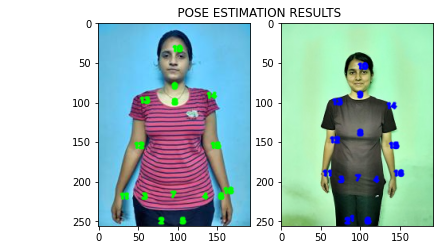

In [11]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
with open('/content/output/pose/val/000183_0.txt','r') as file:
  arr1=[int(a) for a in file.readline().split(' ') if a!='']
with open('/content/output/pose/val/000184_0.txt','r') as file:
  arr=[int(a) for a in file.readline().split(' ') if a!='']
image=cv2.imread('/content/custom/test/image/000183_0.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1=cv2.imread('/content/custom/test/image/000184_0.jpg')
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
#cv2_imshow(image)
#print(arr)
#print(len(arr))
c=0
for i in range(0,len(arr1),2):
  c=c+1
  #print(arr[i],arr[i+1])
  cv2.putText(img, str(c), (arr1[i],arr1[i+1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0),2, cv2.LINE_AA, False)
c=0
for i in range(0,len(arr),2):
  c=c+1
  cv2.putText(img1, str(c), (arr[i],arr[i+1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255),2, cv2.LINE_AA, False)
plt.axis('off')
plt.subplot(1, 2, 1) 
plt.imshow(img)
plt.title('                                            POSE ESTIMATION RESULTS')
plt.subplot(1, 2, 2) 
plt.imshow(img1)
plt.show()


In [12]:
x=[arr[16]/2+arr[18]/2,arr[16],arr[24],arr[22],arr[20],arr[26],arr[28],arr[30],arr[4],arr[2],0,arr[6],0,0,arr[16],arr[18]/2+arr[26]/2,arr[24]/2+arr[16]/2,arr[6]/2+arr[26]/2]
#print(x)
y=[arr[17]/4+arr[19]*0.75,arr[17]/2+arr[15]/2,arr[25],arr[23],arr[21],arr[27],arr[29],arr[31],arr[5],arr[3],0,arr[7],0,0,arr[17]/4+arr[19]*0.75,arr[17]/4+arr[19]*0.75,arr[17]/4+arr[19]*0.75,arr[19]/2+arr[17]/2]
#print(y)
z=[]
for i in range(len(x)):
  z.append(x[i])
  z.append(y[i])
  z.append(1)
#print(z)
#print(len(z))
x1=[arr1[16]/2+arr1[18]/2,arr1[16],arr1[24],arr1[22],arr1[20],arr1[26],arr1[28],arr1[30],arr1[4],arr1[2],0,arr1[6],0,0,arr1[16],arr1[18]/2+arr1[26]/2,arr1[24]/2+arr1[16]/2,arr1[6]/2+arr1[26]/2]
#print(x)
y1=[arr1[17]/4+arr1[19]*0.75,arr1[17]/2+arr1[15]/2,arr1[25],arr1[23],arr1[21],arr1[27],arr1[29],arr1[31],arr1[5],arr1[3],0,arr1[7],0,0,arr1[17]/4+arr1[19]*0.75,arr1[17]/4+arr1[19]*0.75,arr1[17]/4+arr1[19]*0.75,arr1[19]/2+arr1[17]/2]
#print(y)
z2=[]
for i in range(len(x1)):
  z2.append(x1[i])
  z2.append(y1[i])
  z2.append(1)

**RESULT AFTER MANIPULATION**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#arr= [int(a) for a in d['people'][0]['pose_keypoints']]

image=cv2.imread('/content/custom/test/image/000183_0.jpg')
#cv2_imshow(image)
#print(arr)
c=0
k=[int(i) for i in z]
for i in range(0,len(k),3):  
  c=c+1
  #print(k[i],k[i+1])
  cv2.putText(image, str(c), (k[i],k[i+1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255),1, cv2.LINE_AA, False)
#cv2_imshow(image)

**CREATION OF JSON FILE**

In [13]:
dict={"version": 1.0,"people": [{"face_keypoints": [],"pose_keypoints": z,"hand_right_keypoints": [],"hand_left_keypoints": []}]}
#print(dict)
dict1={"version": 1.0,"people": [{"face_keypoints": [],"pose_keypoints": z2,"hand_right_keypoints": [],"hand_left_keypoints": []}]}


In [14]:
import json
with open("/content/custom/test/pose/000183_0_keypoints.json", "w") as outfile: 
    json.dump(dict1, outfile)
with open("/content/custom/test/pose/000184_0_keypoints.json", "w") as outfile: 
    json.dump(dict, outfile)

**HUMAN PARSING**

In [15]:
with fileinput.FileInput("evaluate_parsing_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("./datasets/examples", "/content/custom/test/image"), end='')
with fileinput.FileInput("evaluate_parsing_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("./datasets/examples/list/val.txt", "/content/custom/test_pairs.txt"), end='')
with fileinput.FileInput("evaluate_parsing_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("NUM_STEPS = 6", "NUM_STEPS = 1"), end='')
with fileinput.FileInput("evaluate_parsing_JPPNet-s2.py", inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace("./output/parsing/val", "/content/custom/test/image-parse"), end='')

In [ ]:
!python evaluate_parsing_JPPNet-s2.py 

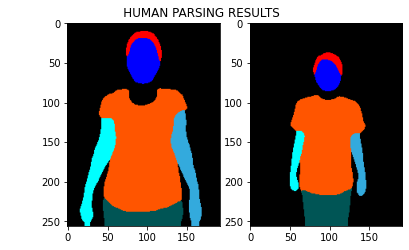

In [17]:
parse=cv2.imread('/content/custom/test/image-parse/000183_0.png')
im = cv2.cvtColor(parse, cv2.COLOR_BGR2RGB)
parse2=cv2.imread('/content/custom/test/image-parse/000184_0.png')
im1 = cv2.cvtColor(parse2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.subplot(1, 2, 1) 
plt.imshow(im)
plt.title('                              HUMAN PARSING RESULTS')
plt.subplot(1, 2, 2) 
plt.imshow(im1)
plt.show()

**CPVTON+**

**SETUP**

In [ ]:
#https://drive.google.com/file/d/1ks-y-vrCvuiMMZfacAb0Ryj2tU_EKG4o/view?usp=sharing
!gdown --id "1ks-y-vrCvuiMMZfacAb0Ryj2tU_EKG4o"

In [ ]:
!unzip /content/CP-VTON+.zip

In [ ]:
#https://drive.google.com/file/d/1LhaYd4iX_aAH85-34mTuVf45kq6IvZFA/view?usp=sharing
!gdown --id "1LhaYd4iX_aAH85-34mTuVf45kq6IvZFA"

In [ ]:
!unzip /content/viton_plus.zip

In [ ]:
pip install -r /content/requirements.txt

In [ ]:
pip install numpy==1.15.0

In [ ]:
pip install torch==0.4.1.post2

**GMM**

In [ ]:
!python test.py --name GMM --stage GMM --workers 4 --datamode test --data_list t-p.txt --checkpoint CP-VTON+/checkpoints/GMM/gmm_final.pth

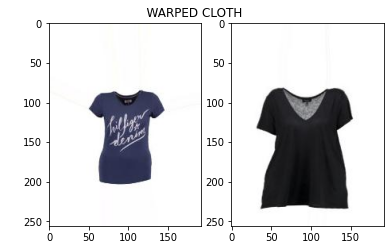

In [ ]:
wc=cv2.imread('/content/custom/test/GMM/test/warp-cloth/000183_0.jpg')
wc1 = cv2.cvtColor(wc, cv2.COLOR_BGR2RGB)
wc2=cv2.imread('/content/custom/test/GMM/test/warp-cloth/000184_0.jpg')
wc3 = cv2.cvtColor(wc2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.subplot(1, 2, 1) 
plt.imshow(wc1)
plt.title('                                    WARPED CLOTH')
plt.subplot(1, 2, 2) 
plt.imshow(wc3)
plt.show()

**TOM**

In [ ]:
!python test.py --name TOM --stage TOM --workers 4 --datamode test --data_list t-p.txt --checkpoint CP-VTON+/checkpoints/TOM/tom_final.pth

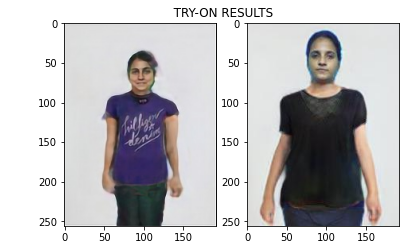

In [ ]:
wp=cv2.imread('/content/custom/test/TOM/test/try-on/000183_0.jpg')
wp1 = cv2.cvtColor(wp, cv2.COLOR_BGR2RGB)
wp2=cv2.imread('/content/custom/test/TOM/test/try-on/000184_0.jpg')
wp3 = cv2.cvtColor(wp2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.subplot(1, 2, 1) 
plt.imshow(wp1)
plt.title('                                           TRY-ON RESULTS')
plt.subplot(1, 2, 2) 
plt.imshow(wp3)
plt.show()

**OVERVIEW**

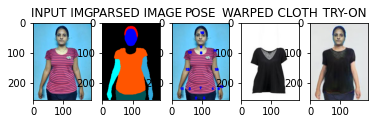

In [ ]:
a=cv2.imread('/content/custom/test/image/000184_0.jpg')
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.subplot(1,5,1)
plt.imshow(a)
plt.title('INPUT IMG')
plt.subplot(1,5,2)
plt.imshow(im1)
plt.title('   PARSED IMAGE')
plt.subplot(1, 5, 3) 
plt.imshow(img1)
plt.title('POSE')
plt.subplot(1, 5, 4) 
plt.imshow(wc3)
plt.title('WARPED CLOTH')
plt.subplot(1, 5, 5) 
plt.imshow(wp3)
plt.title('   TRY-ON')

plt.show()

**ROUGH WORK**

In [96]:
def show():
  fig = plt.figure(figsize=(10, 7))
  rows = 1
  columns = 4
  a1=cv2.imread('/content/custom/test/cloth/017814_1.jpg')
  a2=cv2.imread('/content/custom/test/image/000183_0.jpg')
  a3=cv2.imread('/content/custom/test/GMM/000183_0 (18).jpg')
  a4=cv2.imread('/content/custom/test/TOM/000183_0 (17).jpg')
  fig.add_subplot(rows, columns, 1)
  plt.imshow(cv2.cvtColor(a1,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title("Input cloth")
    
  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
    
  # showing image
  plt.imshow(cv2.cvtColor(a2,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title("Input image")
    
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
    
  # showing image
  plt.imshow(cv2.cvtColor(a3,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title("Warped cloth")
    
  # Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
    
  # showing image
  plt.imshow(cv2.cvtColor(a4,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title("Output")

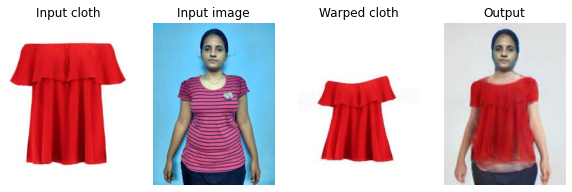

In [80]:
show()

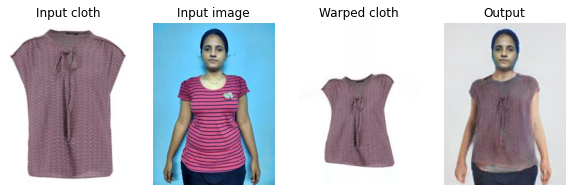

In [72]:
show()

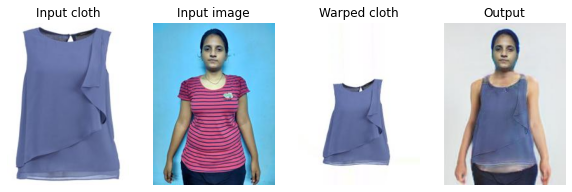

In [74]:
show()

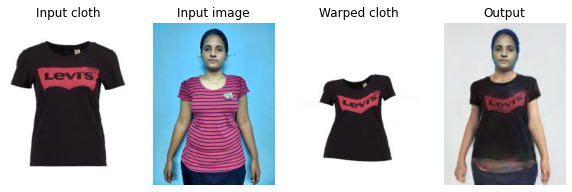

In [84]:
show()

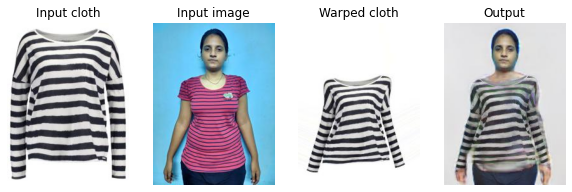

In [76]:
show()

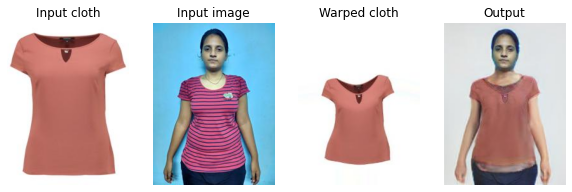

In [88]:
show()

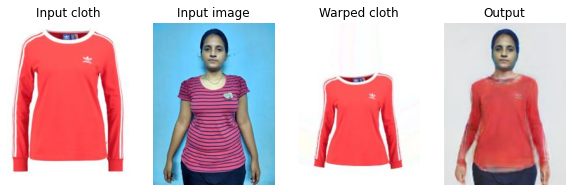

In [95]:
show()

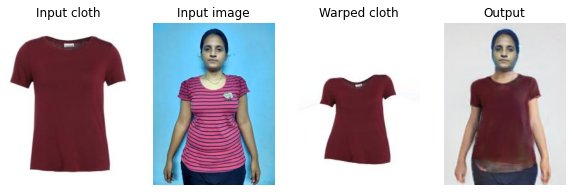

In [97]:
show()

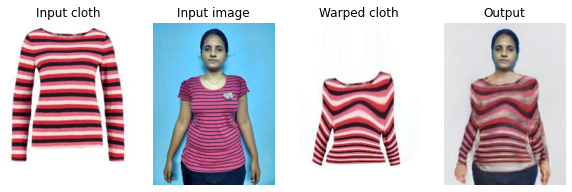

In [78]:
show()